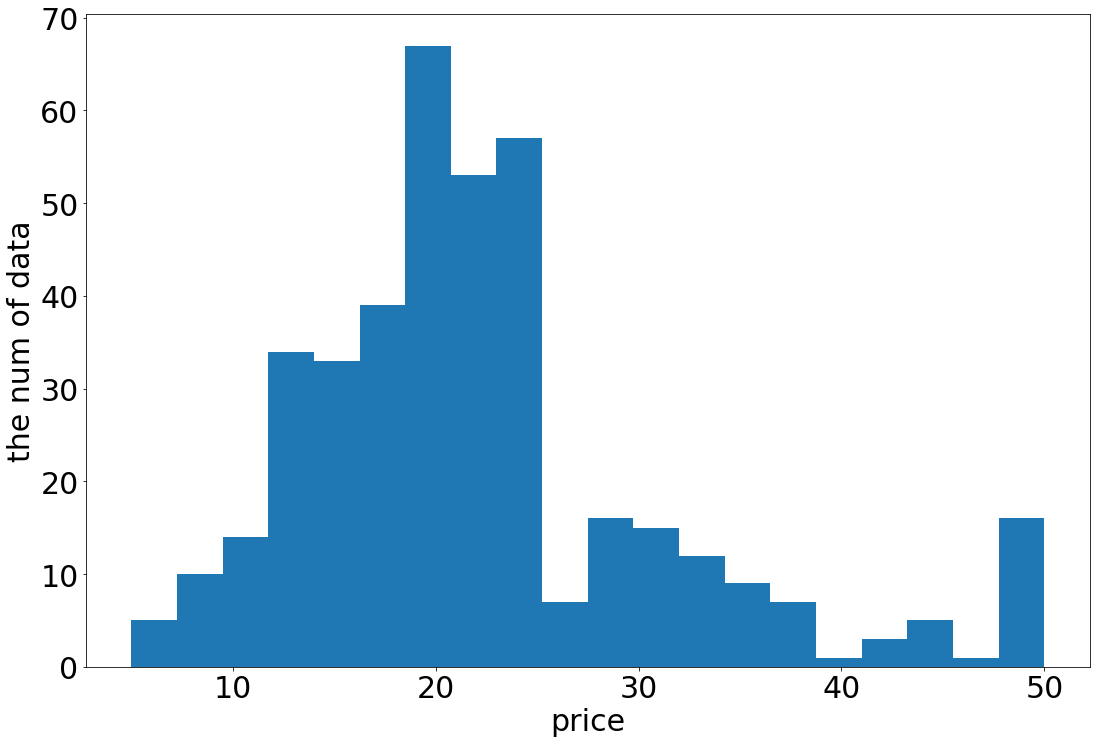

Text(0, 0.5, 'price')

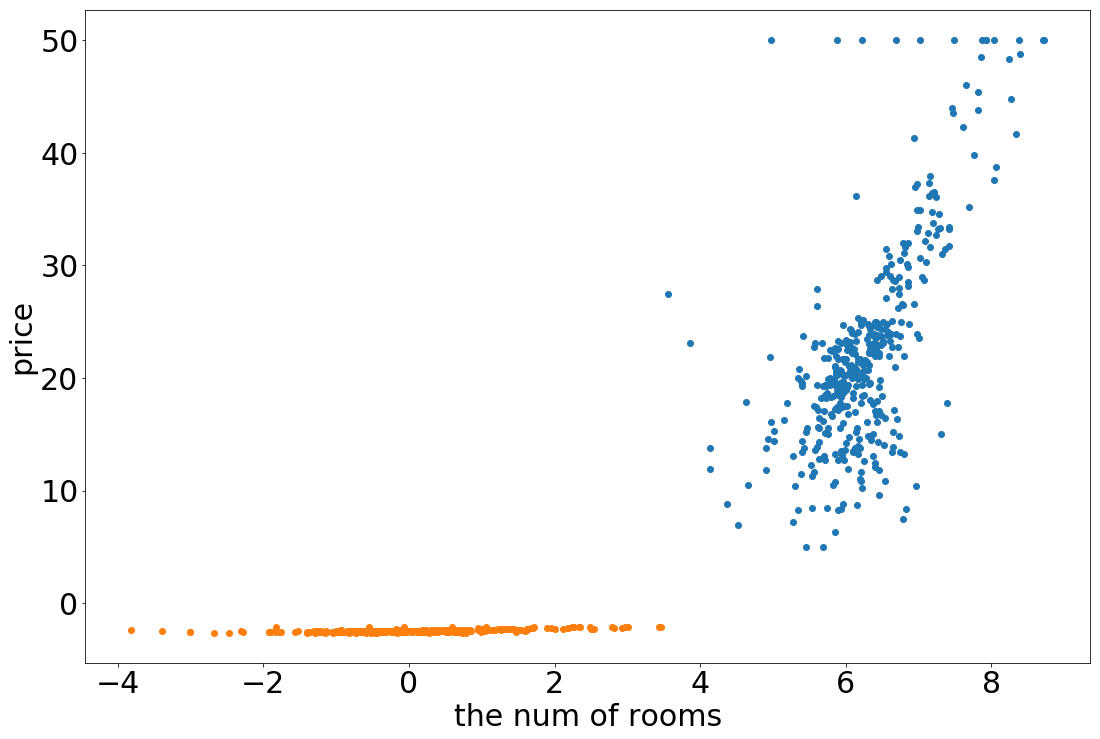

In [4]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10*3
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams['font.family'] = ['IPAexGothic']
plt.hist(y_train, bins=20)
plt.xlabel('price')
plt.ylabel('the num of data')
plt.show()
plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('the num of rooms')
plt.ylabel('price')


Text(0, 0.5, 'price')

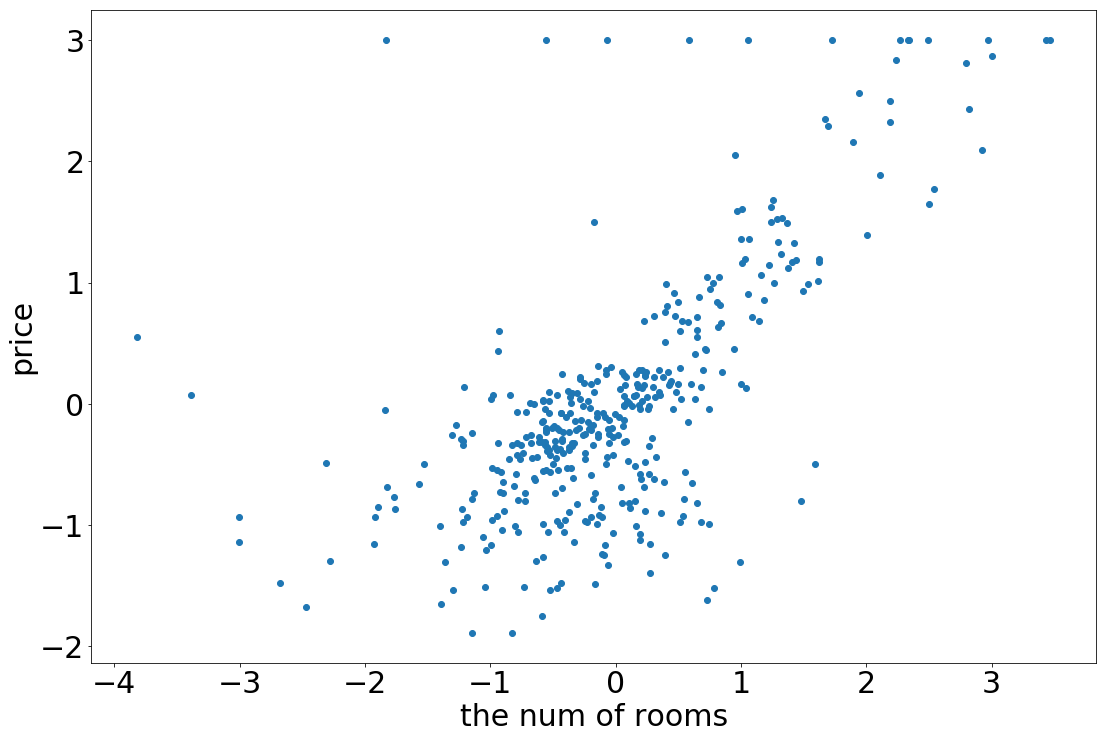

In [7]:
# Generalize, hyoujun-ka

x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)
y_train_mean = y_train.mean(axis=0)
y_train_std = y_train.std(axis=0)

x_train = (x_train - x_train_mean) / x_train_std
y_train = (y_train - y_train_mean) / y_train_std

x_test = (x_train - x_train_mean) / x_train_std
y_test = (y_train - y_train_mean) / y_train_std


plt.plot(x_train[:, 5], y_train, 'o')
plt.xlabel('the num of rooms')
plt.ylabel('price')

In [9]:
x = tf.placeholder(tf.float32, (None, 13), name='x')
y = tf.placeholder(tf.float32, (None, 1), name='y')

w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w)
loss = tf.reduce_mean((y - pred)**2)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_step = optimizer.minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict={
                x: x_train,
                y: y_train.reshape((-1, 1))
            }
        )
        
        print('step: {}, train_loss: {}'.format(step, train_loss))
        
    pred = sess.run(pred, feed_dict={ x: x_test })

Instructions for updating:
Colocations handled automatically by placer.
step: 0, train_loss: 9.26025676727295
step: 1, train_loss: 4.107819080352783
step: 2, train_loss: 2.958662271499634
step: 3, train_loss: 2.345299005508423
step: 4, train_loss: 1.946061134338379
step: 5, train_loss: 1.6697505712509155
step: 6, train_loss: 1.469423770904541
step: 7, train_loss: 1.318016529083252
step: 8, train_loss: 1.1993497610092163
step: 9, train_loss: 1.103451132774353
step: 10, train_loss: 1.023974895477295
step: 11, train_loss: 0.9567486047744751
step: 12, train_loss: 0.8989385962486267
step: 13, train_loss: 0.8485599160194397
step: 14, train_loss: 0.8041800260543823
step: 15, train_loss: 0.7647372484207153
step: 16, train_loss: 0.7294260263442993
step: 17, train_loss: 0.6976203322410583
step: 18, train_loss: 0.6688252091407776
step: 19, train_loss: 0.6426414251327515
step: 20, train_loss: 0.618742823600769
step: 21, train_loss: 0.5968586206436157
step: 22, train_loss: 0.5767616033554077
step: 

In [17]:
import numpy as np

def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch
    

In [19]:
BATCH_SIZE = 32

step = 0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train, y_train, 32):
            train_loss, _ = sess.run(
                [loss, train_step],
                feed_dict={
                    x: x_batch,
                    y: y_batch.reshape((-1, 1))
                }
            )
        print('step: {}, train_loss: {}'.format(step, train_loss))
        step += 1
             
         
        

step: 0, train_loss: 0.5082705616950989
step: 1, train_loss: 0.7102934718132019
step: 2, train_loss: 0.07555387914180756
step: 3, train_loss: 0.1163155660033226
step: 4, train_loss: 0.1777065098285675
step: 5, train_loss: 0.7468303442001343
step: 6, train_loss: 0.22244851291179657
step: 7, train_loss: 0.1649346947669983
step: 8, train_loss: 0.17412790656089783
step: 9, train_loss: 0.36843767762184143
step: 10, train_loss: 0.40243983268737793
step: 11, train_loss: 0.4235665202140808
step: 12, train_loss: 0.4931558668613434
step: 13, train_loss: 0.13673219084739685
step: 14, train_loss: 0.18513137102127075
step: 15, train_loss: 0.8088595271110535
step: 16, train_loss: 0.28607267141342163
step: 17, train_loss: 0.3253425359725952
step: 18, train_loss: 0.19934110343456268
step: 19, train_loss: 0.6761242151260376
step: 20, train_loss: 0.09877507388591766
step: 21, train_loss: 0.39043813943862915
step: 22, train_loss: 0.2590444087982178
step: 23, train_loss: 0.28039777278900146
step: 24, trai